In [83]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
dataset = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [85]:
df = pd.read_csv(dataset, parse_dates=True)
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [87]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [88]:
df.shape

(2035, 8)

In [89]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [90]:
for i in df.columns[1:7]:
    print('Correlation between',i,'and Turnover : ',df[i].corr(df['Turnover (Lacs)']))

Correlation between Open and Turnover :  0.6128772564497109
Correlation between High and Turnover :  0.6305889329172235
Correlation between Low and Turnover :  0.6085017682441262
Correlation between Last and Turnover :  0.6245839436986288
Correlation between Close and Turnover :  0.6242126900378612
Correlation between Total Trade Quantity and Turnover :  0.9269309867610743


In [91]:
correlations=df.corr()
correlations

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


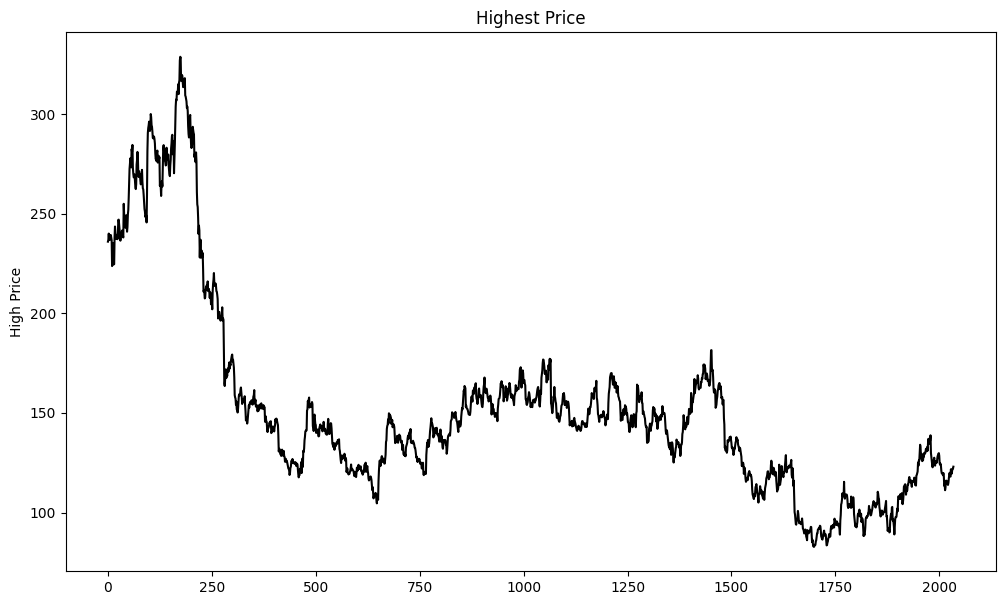

In [92]:
plt.figure(figsize=(12,7))
plt.plot(df['High'],c='black')
plt.title('Highest Price')
plt.ylabel('High Price')
plt.show()

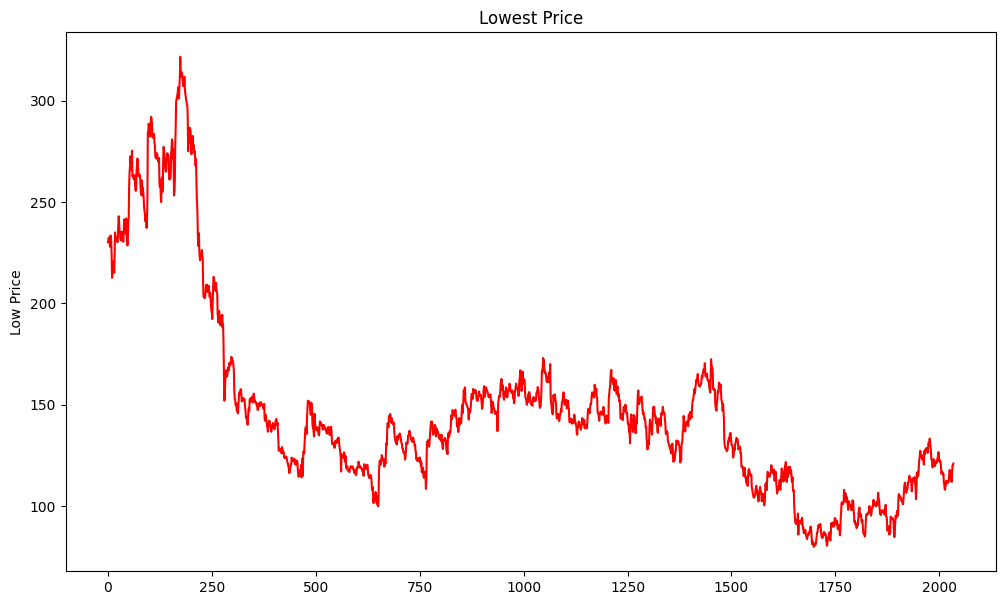

In [93]:
plt.figure(figsize=(12,7))
plt.plot(df['Low'],c='red')
plt.title('Lowest Price')
plt.ylabel('Low Price')
plt.show()

<AxesSubplot:>

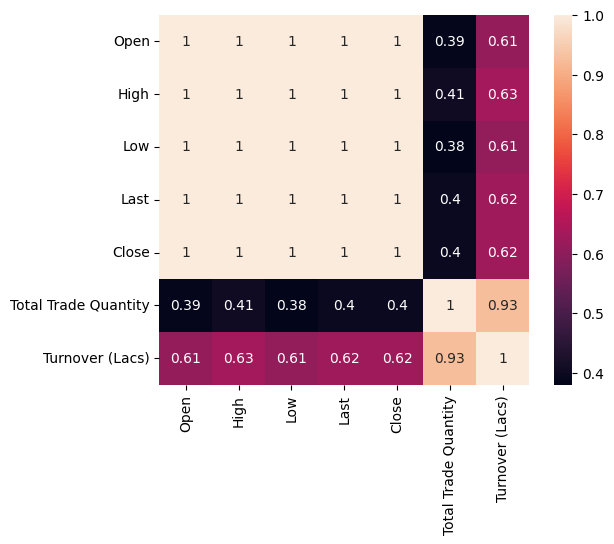

In [94]:
sns.heatmap(data=correlations, square=True,annot=True)

Text(0.5, 1.0, 'Total Trade Quantity Graph')

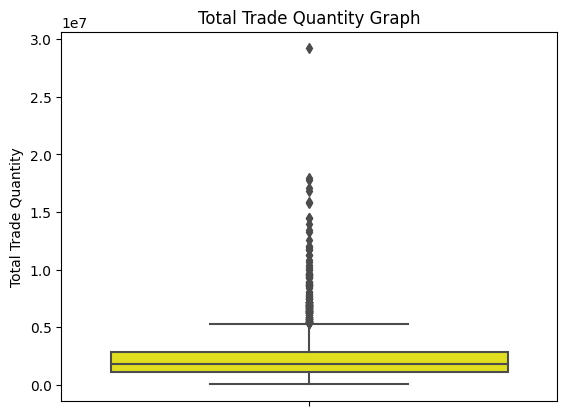

In [95]:
sns.boxplot(data=df,y='Total Trade Quantity',color='yellow')
plt.title('Total Trade Quantity Graph')

Text(0.5, 1.0, 'Turnover Graph')

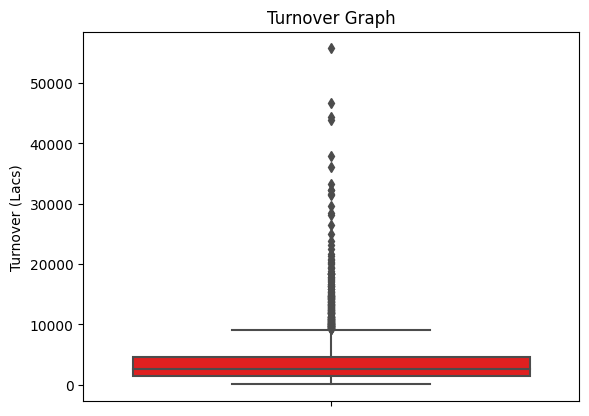

In [96]:
sns.boxplot(data=df,y='Turnover (Lacs)',color='red')
plt.title('Turnover Graph')

In [97]:
data_train = df[['Open']]
data_train = pd.DataFrame(data_train)
data_train

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(data_train)
print(scaled_train)
scaled_train.shape

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


(2035, 1)

In [99]:
X_train_size= int(len(scaled_train)*0.75)
X_test_size=int(len(scaled_train))-X_train_size
X_train_data,X_test_data=scaled_train[0:X_train_size,:],scaled_train[X_train_size:len(df),:1]
print(X_train_size)
X_test_data.size

1526


509

In [100]:
def split_data(data,cons=1):
    X_data, y_data = [], []
    for i in range(len(data)-cons-1):
        a = data[i:(i+cons), 0]
        X_data.append(a)
        y_data.append(data[i+cons,0])
    return np.array(X_data), np.array(y_data)

In [101]:
cons = 100
X_train, y_train=split_data(X_train_data, cons)
X_test, y_test=split_data(X_test_data, cons)

In [102]:
print(X_train.shape)
print(y_train.shape)

(1425, 100)
(1425,)


In [103]:
print(X_test.shape)
print(y_test.shape)

(408, 100)
(408,)


In [104]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_train.shape

(1425, 100, 1)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [106]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [110]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64, verbose = True)

Epoch 1/50
23/23 [==============================] - 4s 174ms/step - loss: 6.1273e-04 - acc: 7.0175e-04 - val_loss: 8.8240e-04 - val_acc: 0.0025
Epoch 2/50
23/23 [==============================] - 4s 169ms/step - loss: 6.4975e-04 - acc: 7.0175e-04 - val_loss: 6.0253e-04 - val_acc: 0.0025
Epoch 3/50
23/23 [==============================] - 4s 182ms/step - loss: 8.0383e-04 - acc: 7.0175e-04 - val_loss: 7.1992e-04 - val_acc: 0.0025
Epoch 4/50
23/23 [==============================] - 5s 240ms/step - loss: 9.9327e-04 - acc: 7.0175e-04 - val_loss: 7.1630e-04 - val_acc: 0.0025
Epoch 5/50
23/23 [==============================] - 5s 231ms/step - loss: 7.2905e-04 - acc: 7.0175e-04 - val_loss: 4.9831e-04 - val_acc: 0.0025
Epoch 6/50
23/23 [==============================] - 5s 204ms/step - loss: 7.7406e-04 - acc: 7.0175e-04 - val_loss: 9.9601e-04 - val_acc: 0.0025
Epoch 7/50
23/23 [==============================] - 4s 190ms/step - loss: 7.5363e-04 - acc: 7.0175e-04 - val_loss: 6.7519e-04 - val_acc:

In [111]:
X_train_predict=model.predict(X_train)
X_test_predict=model.predict(X_test)
X_train_predict.shape

13/13 [==============================] - 0s 32ms/step


(1425, 1)

In [112]:
print(mean_squared_error(y_train,X_train_predict))
print(mean_squared_error(y_test,X_test_predict))

0.00028457286603203653
0.0002825894138744673


<function matplotlib.pyplot.show(close=None, block=None)>

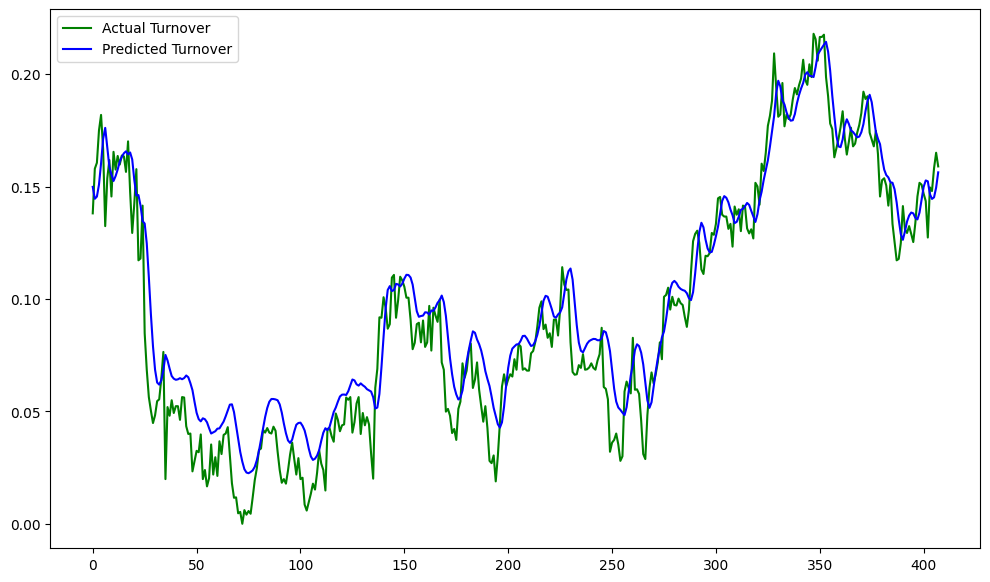

In [113]:
plt.figure(figsize=(12,7))
plt.plot(y_test,color = 'green',label='Actual Turnover')
plt.plot(X_test_predict,color = 'blue', label='Predicted Turnover')
plt.legend()
plt.show